In [1]:
#import essential libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
#import dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 240.0+ bytes


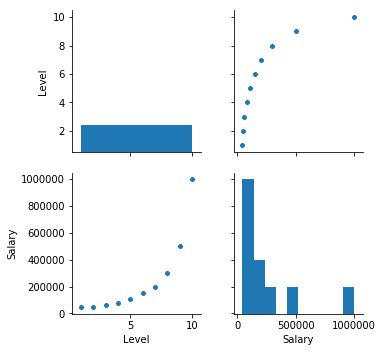

In [6]:
#simple data visualisation 
sns.pairplot(dataset)

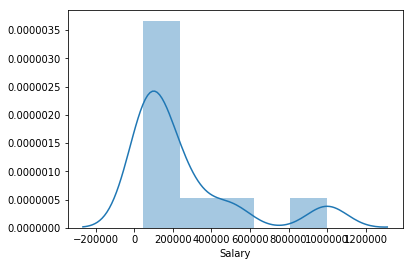

In [7]:
sns.distplot(dataset['Salary'],bins=5)

In [8]:
#split dataset to X and y
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [9]:
#create a simple linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

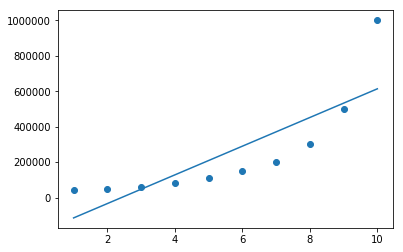

In [10]:
#visualize the regression model
plt.scatter(X,y)
plt.plot(X,regressor.predict(X))

In [11]:
regressor.predict(6.5)

array([330378.78787879])

In [12]:
#lets try improving the result with polynomial regression with a degree of 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
#create an instance of the linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

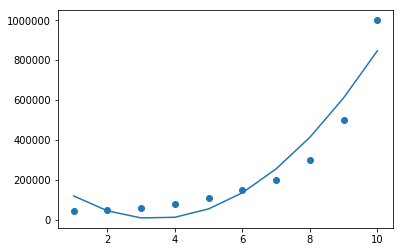

In [13]:
#lets try visualizing this now 
plt.scatter(X,y)
plt.plot(X,lin_reg_2.predict(poly.fit_transform(X)))

In [14]:
#lets try predicting the Salary of position at 6.5 again
lin_reg_2.predict(poly.fit_transform(6.5))

array([189498.10606061])

array([133259.46969697])

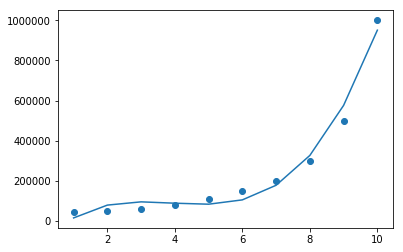

In [15]:
#lets repeat the same polynomial process with an order of 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
#create an instance of the linear regression
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)
plt.scatter(X,y)
plt.plot(X,lin_reg_3.predict(poly.fit_transform(X)))
#lets try predicting the Salary of position at 6.5 again
lin_reg_3.predict(poly.fit_transform(6.5))

array([158862.4526515])

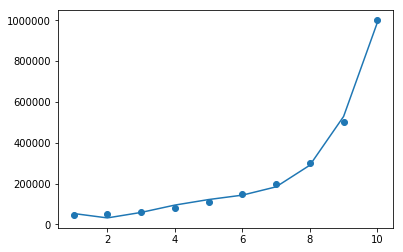

In [17]:
#lets repeat the same polynomial process with an order of 4
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
#create an instance of the linear regression
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)
plt.scatter(X,y)
plt.plot(X,lin_reg_4.predict(poly.fit_transform(X)))
#lets try predicting the Salary of position at 6.5 again
lin_reg_4.predict(poly.fit_transform(6.5))

array([174878.07765128])

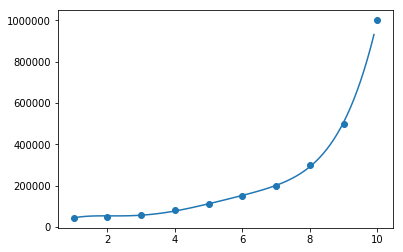

In [24]:
#lets repeat the same polynomial process with an order of 5 but with a better
#resolution and smoother curve
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
#create an instance of the linear regression
lin_reg_5 = LinearRegression()
lin_reg_5.fit(X_poly, y)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X,y)
plt.plot(X_grid,lin_reg_5.predict(poly.fit_transform(X_grid)))
#lets try predicting the Salary of position at 6.5 again
lin_reg_5.predict(poly.fit_transform(6.5))
